# Shaping univariate distributions

Jaime Lopez  
jailop AT protonmail DOT com  
Feb. 2020

Usually, the first step to deal with a dataset is exploring how it is distributed. That is, for each one of its attributes, dividing the range between its maximum and minumum values into intervals and counting how many observations fall in each one of them.

In this notebook, it is shown how to visualize or estimate data distributions using the Iris dataset as an example. The Iris dataset has four attributes: sepal length, sepal width, petal length, and petal width, all of them measured in centimeters; and there are three classes: iris-setosa, iris-versicolour, and iris-virginica

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn import datasets
from scipy import stats

colors = [c for c in mcolors.TABLEAU_COLORS]

In [2]:
iris = datasets.load_iris()
labels = ['sepal length', 'sepal width', 'petal length', 'petal width']
classes = ['iris-setosa', 'iris-versicolour', 'iris-virginica']
d = len(labels)

One way to visualize data distributions is by using histograms.

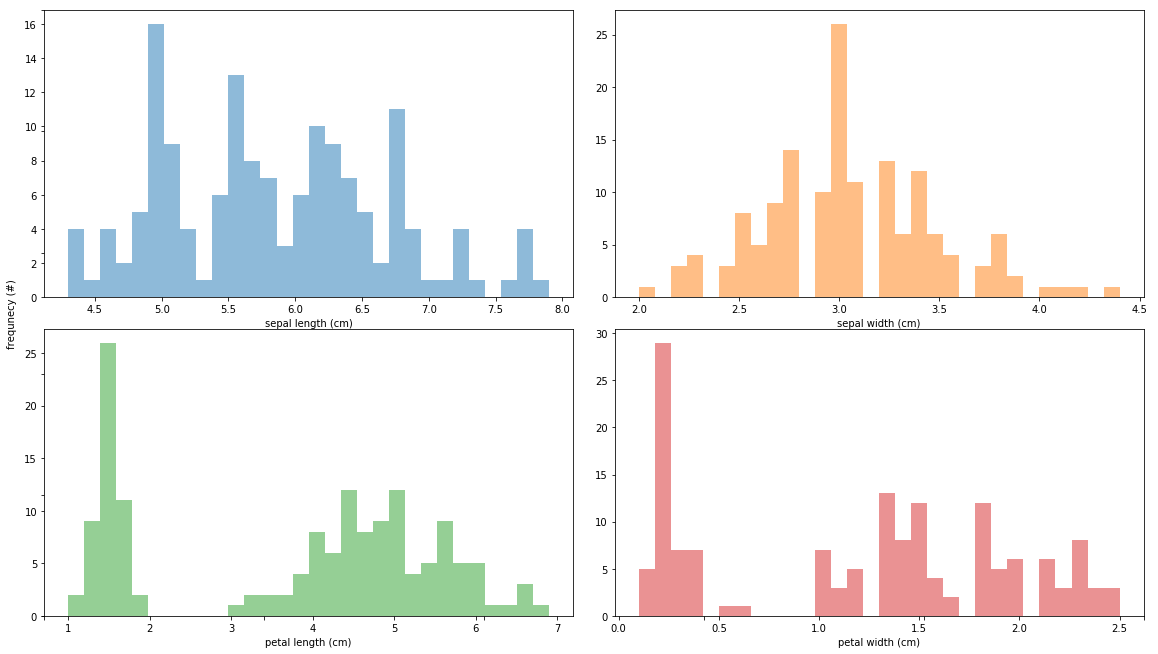

In [3]:
attributes = [el for el in zip(labels, range(4))]
fig, ax = plt.subplots(2, 2, figsize=(16, 9))
fig.tight_layout()
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none')
plt.ylabel('frequnecy (#)')
for i in [0, 1]:
    for j in [0, 1]:
        attr = i * 2 + j
        ax[i, j].hist(iris.data[:, attr], color=colors[attr], bins=30, alpha=0.5)
        ax[i, j].set_xlabel('{} (cm)'.format(attributes[attr][0]))


Furthermore, boxplots are useful to compare distributions of two or more attributes.

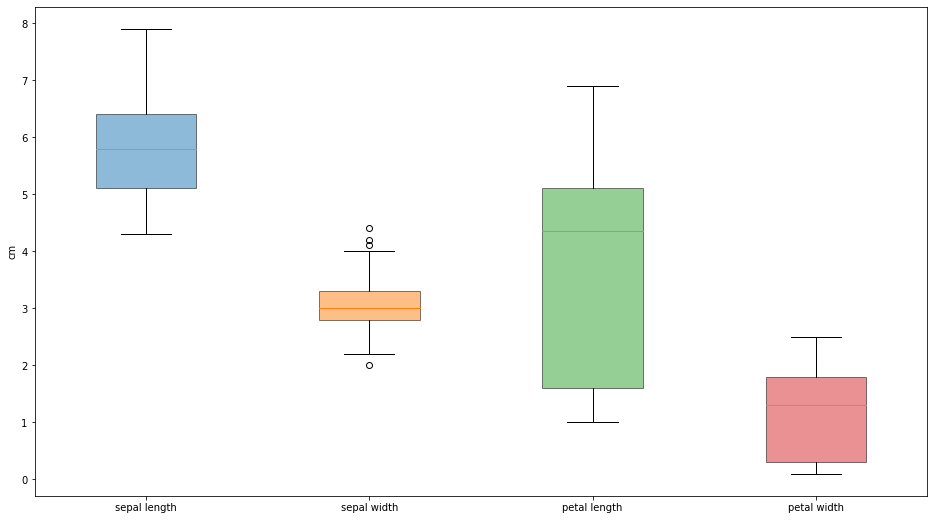

In [4]:
fig, ax = plt.subplots(figsize=(16,9))
res = ax.boxplot(iris.data, patch_artist=True)
ax.set_xticklabels(labels)
ax.set_ylabel('cm')
for box, color in zip(res['boxes'], colors):
    box.set_facecolor(color)
    box.set_alpha(0.5)

More useful can be to have approximated curves to represent data distributions.

Text(0, 0.5, 'frequency (#)')

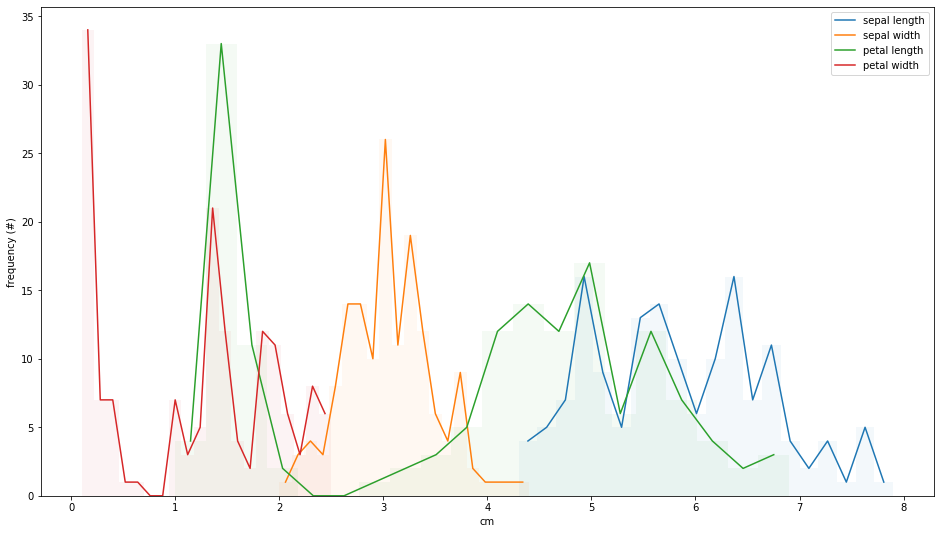

In [5]:
bins = 20
plt.figure(figsize=(16, 9))
dist = [np.histogram(iris.data[:, i], bins=bins) for i in range(d)]
for i in range(d):
    serie = dist[i]
    off = (serie[1][1] - serie[1][0]) / 2
    plt.plot(serie[1][:-1] + off, serie[0], color=colors[i], label=labels[i])
    plt.hist(iris.data[:, i], bins=bins, alpha=0.05)
plt.legend()
plt.xlabel('cm')
plt.ylabel('frequency (#)')

A more advanced inquiry is the estimation of a kernel density function (KDE) for every distribution.

Text(0, 0.5, 'relative frequency')

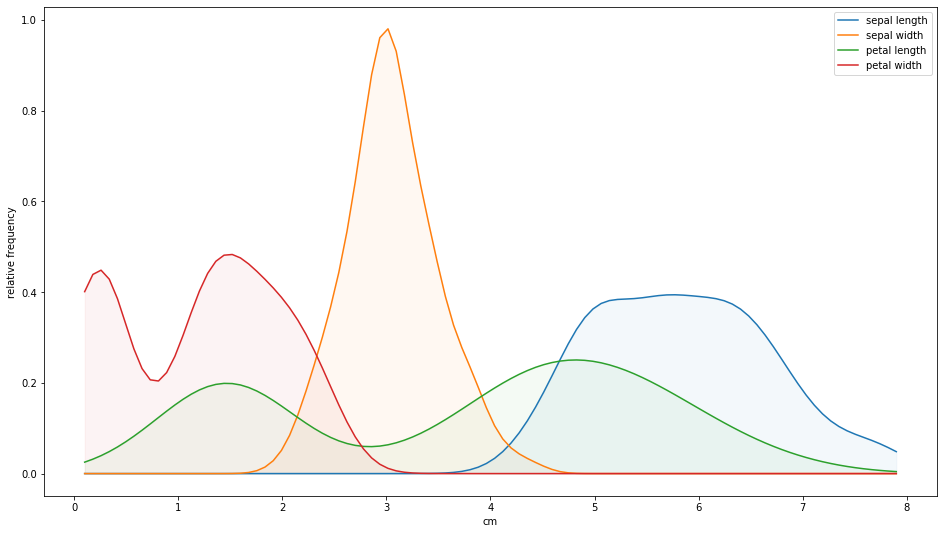

In [6]:
bins = 100
plt.figure(figsize=(16, 9))
x = np.linspace(iris.data.min(), iris.data.max(), bins)
for i in range(d):
    serie = iris.data[:, i]
    KDE = stats.gaussian_kde(serie)
    y = KDE(x)
    plt.plot(x, y, label=labels[i], color=colors[i])
    plt.fill_between(x, 0, y, color=colors[i], alpha=0.05)
plt.legend()
plt.xlabel('cm')
plt.ylabel('relative frequency')

Another way to explore data is by using cumulative distributions.

Text(0, 0.5, 'relative frequency')

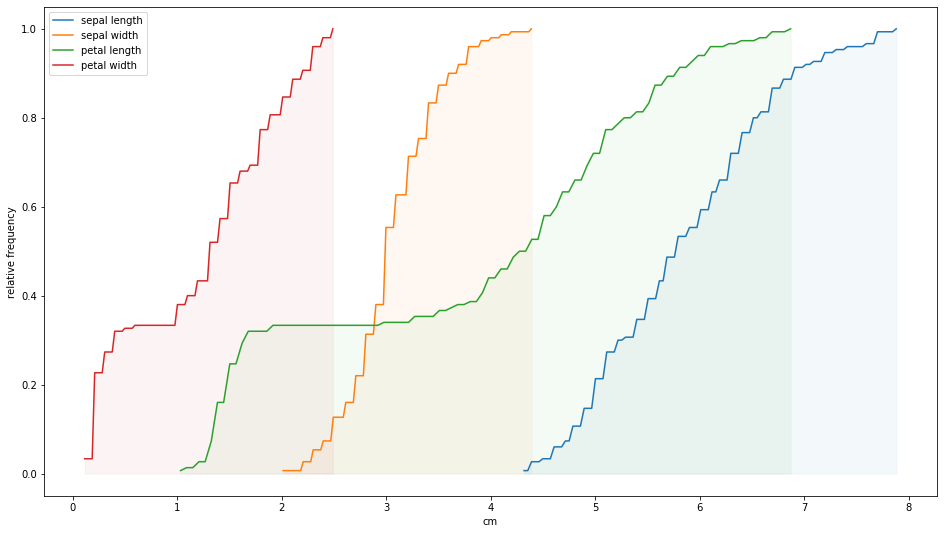

In [7]:
bins = 100
plt.figure(figsize=(16, 9))
dist = [np.histogram(iris.data[:, i], bins=bins) for i in range(d)]
for i in range(d):
    serie = dist[i]
    off = (serie[1][1] - serie[1][0]) / 2
    x = serie[1][:-1] + off
    y = np.add.accumulate(serie[0]) / serie[0].sum()
    plt.plot(x, y, color=colors[i], label=labels[i])
    plt.fill_between(x, 0, y, color=colors[i], alpha=0.05)
plt.legend()
plt.xlabel('cm')
plt.ylabel('relative frequency')

Until this point, it looks distributions are irregular, far away from the shaped bell curve of a normal distribution. In this case what happens is that the dataset has attributes for three different classes of Iris flowers, so it has samples from different populations.

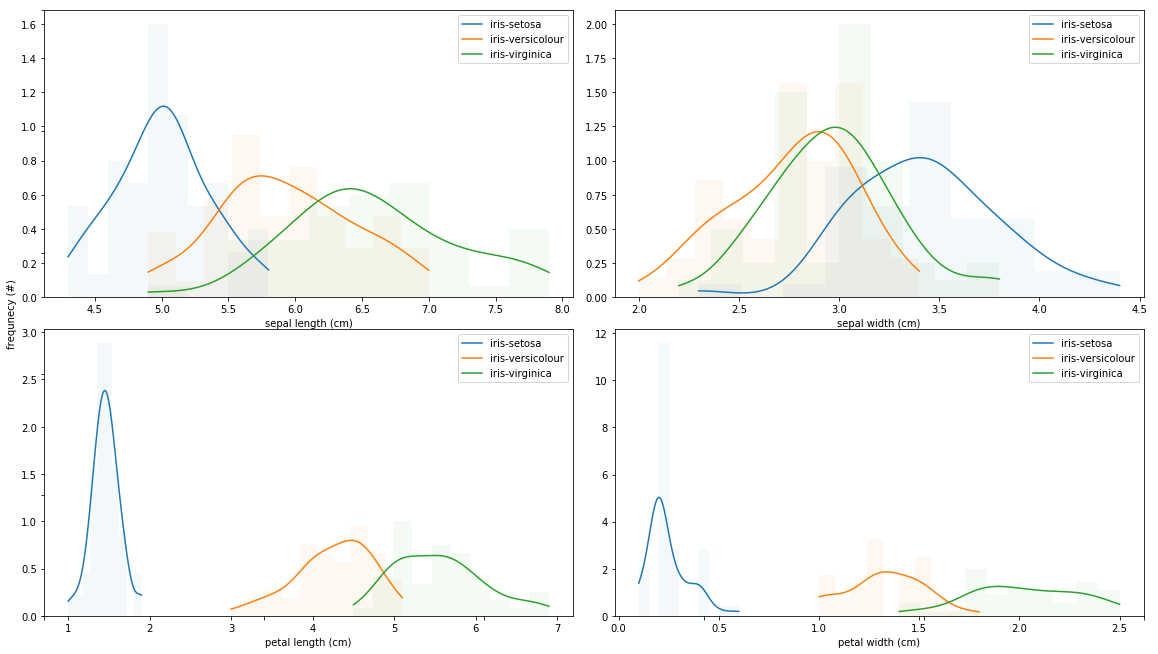

In [8]:
bins = 10
targets = np.unique(iris.target)
n_targets = len(targets)
attributes = [el for el in zip(labels, range(4))]
fig, ax = plt.subplots(2, 2, figsize=(16, 9))
fig.tight_layout()
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none')
plt.ylabel('frequnecy (#)')
for i in [0, 1]:
    for j in [0, 1]:
        attr = i * 2 + j
        ax[i, j].set_xlabel('{} (cm)'.format(attributes[attr][0]))
        for k in range(n_targets):
            subset = iris.data[:, attr][iris.target == k]
            ax[i, j].hist(subset, color=colors[k], density=True, bins=bins, alpha=0.05)
            x = np.linspace(subset.min(), subset.max(), 100)
            KDE = stats.gaussian_kde(subset)
            y = KDE(x)
            ax[i, j].plot(x, y, color=colors[k], label=classes[k])
            ax[i, j].legend()      

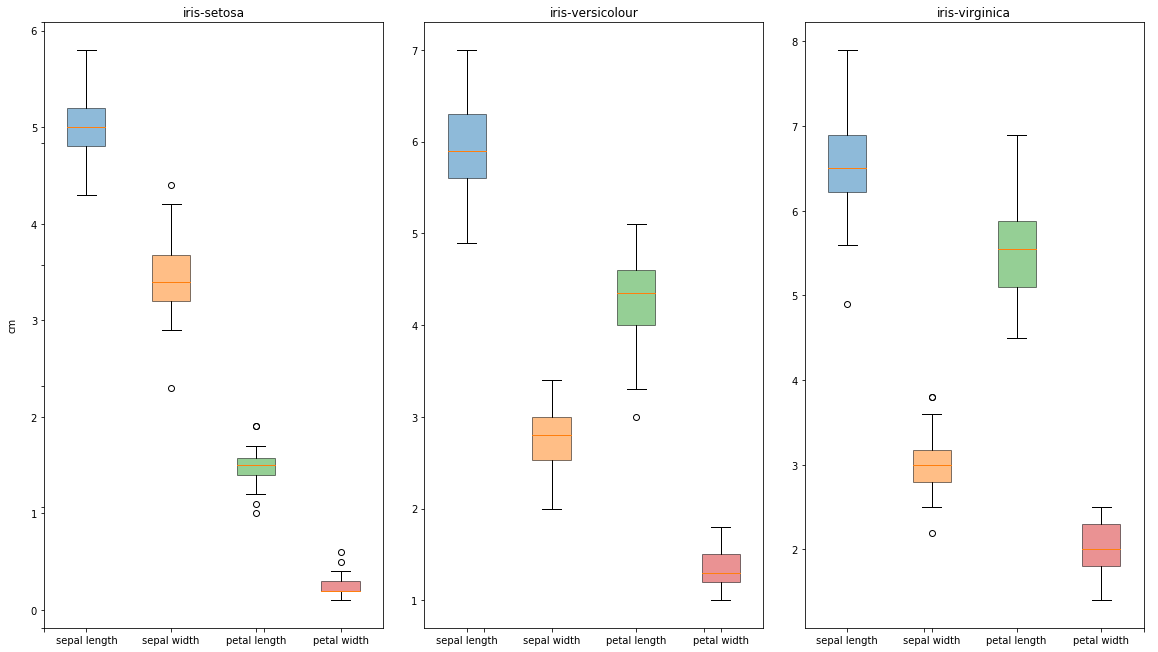

In [9]:
fig, ax = plt.subplots(1, n_targets, figsize=(16, 9))
fig.tight_layout()
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none')
plt.ylabel('cm')
for i in range(n_targets):
    subset = iris.data[iris.target == i]
    res = ax[i].boxplot(subset, patch_artist=True)
    ax[i].set_title(classes[i])
    ax[i].set_xticklabels(labels)
    # ax[i].set_ylabel('cm')
    for box, color in zip(res['boxes'], colors):
        box.set_facecolor(color)
        box.set_alpha(0.5)

Understanding data distributions, we can gain more knowledge about a dataset and the reality it is representing. Of course, our analysis is still limited because we are not exploring the relationship between attributes and its correspondence to classes.